## Costos - Herramientas Profesionales SA

Herramientas Profesionales SA fabrica un solo modelo de destornilladores. En Febrero de 2022 vendió al contado 7.500 unidades a $52 cada una, otorgando un descuento de caja del 10%. En ese periodo la cuenta Productos en proceso fue debitada por los siguientes montos en concepto de salarios y gastos:

- Salarios netos: $18.000
- Cargas sociales: $9.000
- Lubricantes: $900
- Depreciación y seguros: $1.800
- Combustibles: $3.600
- Sueldos y cargas sociales supervisores $5.400
- Repuestos: $2.700
- Seguros de producción $650
- Otros costos generales: $3.600

Otros gastos:

- Impuesto sobre las ventas: 2% sobre ventas
- Otros Gastos Comerciales: 8% sobre ventas
- Gastos de Administración: $5.700

En cuanto a sus inventarios, las cifras fueron las siguientes:

| 🔢 CONCEPTO | 💰 SALDO INICIAL | 📊 SALDO FINAL | 🛒 COMPRAS DEL MES |
|------------|-----------------|-------------------|---------------|
| **🛢️ Acero (Materia Prima)** | $72.000 | $108.000 | $126.000 |
| **⚙️ Producción en Proceso** | - | $2.400 | - |
| **✅ Producción Terminada ($)** | - | *A determinar* | - |
| **📦 Producción Terminada (unid)** | - | 15.000 u | - |

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [18]:
# Configuración de estilo para pandas
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
# Datos proporcionados
datos = {
    'Salarios netos': 18000,
    'Cargas sociales': 9000,
    'Lubricantes': 900,
    'Depreciación y seguros': 1800,
    'Combustibles': 3600,
    'Sueldos y cargas sociales supervisores': 5400,
    'Repuestos': 2700,
    'Seguros de producción': 650,
    'Otros costos generales': 3600,
    'Gastos de Administración': 5700,
    'Impuesto sobre ventas': 0.02,
    'Otros Gastos Comerciales': 0.08,
    'Ventas unidades': 7500,
    'Precio unitario': 52,
    'Descuento caja': 0.10,
    'Inventario Inicial Acero': 72000,
    'Compras Acero': 126000,
    'Inventario Final Acero': 108000,
    'Inventario Inicial Proceso': 2400,
    'Produccion Terminada unidades': 22500
}

**Cálculos**

#### 1. Costo Primo Total

\begin{align*}
\text{Materia Prima Directa} &= \text{Inventario Inicial} + \text{Compras} - \text{Inventario Final} \\
\\
\text{Mano de Obra Directa} &= \text{Salarios Netos} + \text{Cargas Sociales} \\
\\
\text{Costo Primo Total} &= \text{Materia Prima Directa} + \text{Mano de Obra Directa} \\
\\
\end{align*}

In [20]:
# 1. Costo Primo Total
materia_prima_directa = datos['Inventario Inicial Acero'] + datos['Compras Acero'] - datos['Inventario Final Acero']
mano_obra_directa = datos['Salarios netos'] + datos['Cargas sociales']
costo_primo_total = materia_prima_directa + mano_obra_directa
print(f"Costo Primo Total: ${costo_primo_total:,.2f}")

Costo Primo Total: $117,000.00


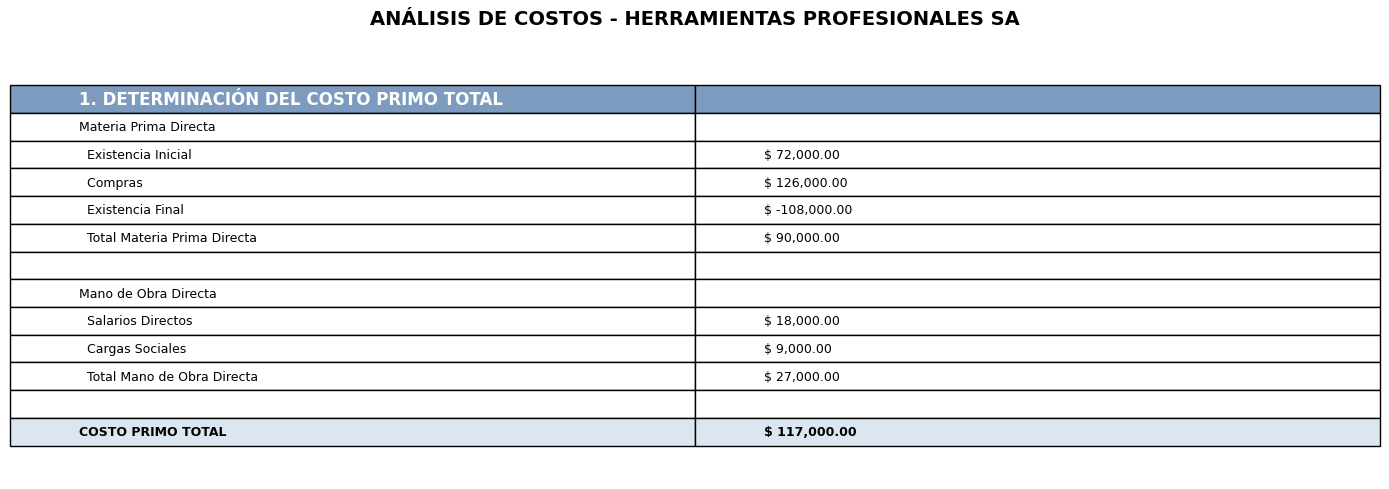

In [21]:
def crear_seccion_costo_primo():
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.axis('tight')
    ax.axis('off')
    
    font = FontProperties(family='monospace', size=10)
    
    contenido = [
        ["1. DETERMINACIÓN DEL COSTO PRIMO TOTAL", ""],
        ["Materia Prima Directa", ""],
        ["  Existencia Inicial", f"$ {datos['Inventario Inicial Acero']:,.2f}"],
        ["  Compras", f"$ {datos['Compras Acero']:,.2f}"],
        ["  Existencia Final", f"$ -{datos['Inventario Final Acero']:,.2f}"],
        ["  Total Materia Prima Directa", f"$ {materia_prima_directa:,.2f}"],
        ["", ""],
        ["Mano de Obra Directa", ""],
        ["  Salarios Directos", f"$ {datos['Salarios netos']:,.2f}"],
        ["  Cargas Sociales", f"$ {datos['Cargas sociales']:,.2f}"],
        ["  Total Mano de Obra Directa", f"$ {mano_obra_directa:,.2f}"],
        ["", ""],
        ["COSTO PRIMO TOTAL", f"$ {costo_primo_total:,.2f}"],
    ]
    
    table = ax.table(cellText=contenido, cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_text_props(weight='bold', size=12, color='white')
            cell.set_facecolor("#7D9BBE")
        elif contenido[i][0].isupper() and not contenido[i][0].isdigit():
            cell.set_facecolor('#DCE6F1')
            cell.set_text_props(weight='bold')
        elif contenido[i][0].startswith('COSTO'):
            cell.set_facecolor('#FCD5B4')
            cell.set_text_props(weight='bold')
    
    plt.title("ANÁLISIS DE COSTOS - HERRAMIENTAS PROFESIONALES SA", fontsize=14, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()

crear_seccion_costo_primo()

#### 2. Costo de Conversión Total

\begin{align*}
\text{CIF} &= \sum \text{Costos Indirectos de Fabricación} \\
\\
\text{Costo de Conversión Total} &= \text{Mano de Obra Directa} + \text{CIF} \\
\end{align*}

In [22]:
# 2. Costo de Conversión Total
cif = (datos['Lubricantes'] + datos['Depreciación y seguros'] + datos['Combustibles'] + 
       datos['Sueldos y cargas sociales supervisores'] + datos['Repuestos'] + 
       datos['Seguros de producción'] + datos['Otros costos generales'])
costo_conversion_total = mano_obra_directa + cif
print(f"Costo de Conversión Total: ${costo_conversion_total:,.2f}")

Costo de Conversión Total: $45,650.00


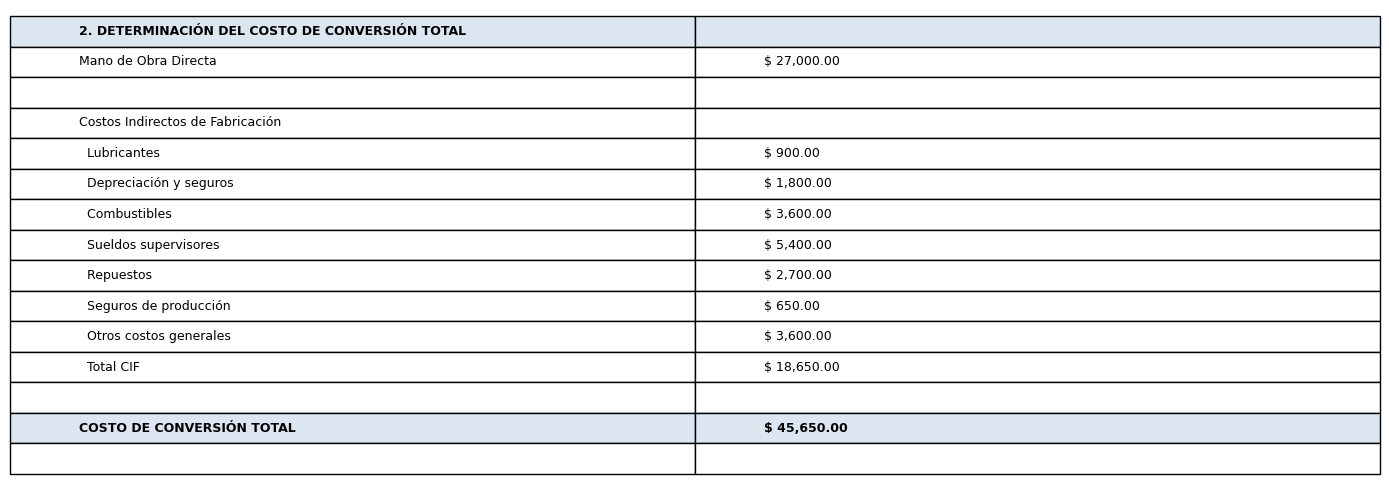

In [23]:
def crear_seccion_conversion_produccion():
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.axis('tight')
    ax.axis('off')
    
    font = FontProperties(family='monospace', size=10)
    
    contenido = [
        ["2. DETERMINACIÓN DEL COSTO DE CONVERSIÓN TOTAL", ""],
        ["Mano de Obra Directa", f"$ {mano_obra_directa:,.2f}"],
        ["", ""],
        ["Costos Indirectos de Fabricación", ""],
        ["  Lubricantes", f"$ {datos['Lubricantes']:,.2f}"],
        ["  Depreciación y seguros", f"$ {datos['Depreciación y seguros']:,.2f}"],
        ["  Combustibles", f"$ {datos['Combustibles']:,.2f}"],
        ["  Sueldos supervisores", f"$ {datos['Sueldos y cargas sociales supervisores']:,.2f}"],
        ["  Repuestos", f"$ {datos['Repuestos']:,.2f}"],
        ["  Seguros de producción", f"$ {datos['Seguros de producción']:,.2f}"],
        ["  Otros costos generales", f"$ {datos['Otros costos generales']:,.2f}"],
        ["  Total CIF", f"$ {cif:,.2f}"],
        ["", ""],
        ["COSTO DE CONVERSIÓN TOTAL", f"$ {costo_conversion_total:,.2f}"],
        ["", ""],
    ]
    
    table = ax.table(cellText=contenido, cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    for (i, j), cell in table.get_celld().items():
        if contenido[i][0].isupper() and not contenido[i][0].isdigit():
            cell.set_facecolor('#DCE6F1')
            cell.set_text_props(weight='bold')
        elif contenido[i][0].startswith('COSTO'):
            cell.set_facecolor('#FCD5B4')
            cell.set_text_props(weight='bold')
    
    plt.tight_layout()
    plt.show()

crear_seccion_conversion_produccion()

#### 3. Costo de Producción Total

\begin{align*}
\text{Costo de Producción Total} &= \text{MPD} + \text{MOD} + \text{CIF} - \text{Inv. Inicial Proc.} \\
\end{align*}

In [24]:
# 3. Costo de Producción Total
costo_produccion_total = materia_prima_directa + mano_obra_directa + cif - datos['Inventario Inicial Proceso']
print(f"Costo de Producción Total: ${costo_produccion_total:,.2f}")


Costo de Producción Total: $133,250.00


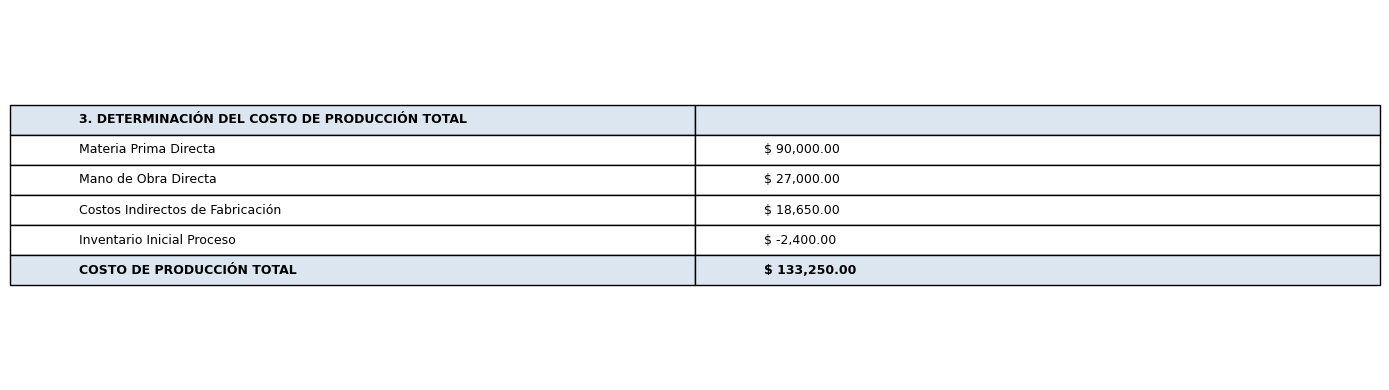

In [25]:
def crear_seccion_conversion_produccion():
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis('tight')
    ax.axis('off')
    
    font = FontProperties(family='monospace', size=10)
    
    contenido = [
        ["3. DETERMINACIÓN DEL COSTO DE PRODUCCIÓN TOTAL", ""],
        ["Materia Prima Directa", f"$ {materia_prima_directa:,.2f}"],
        ["Mano de Obra Directa", f"$ {mano_obra_directa:,.2f}"],
        ["Costos Indirectos de Fabricación", f"$ {cif:,.2f}"],
        ["Inventario Inicial Proceso", f"$ -{datos['Inventario Inicial Proceso']:,.2f}"],
        ["COSTO DE PRODUCCIÓN TOTAL", f"$ {costo_produccion_total:,.2f}"],
    ]
    
    table = ax.table(cellText=contenido, cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    for (i, j), cell in table.get_celld().items():
        if contenido[i][0].isupper() and not contenido[i][0].isdigit():
            cell.set_facecolor('#DCE6F1')
            cell.set_text_props(weight='bold')
        elif contenido[i][0].startswith('COSTO'):
            cell.set_facecolor('#FCD5B4')
            cell.set_text_props(weight='bold')
    
    plt.tight_layout()
    plt.show()

crear_seccion_conversion_produccion()

#### 4. Estado de Resultados

\begin{align*}
\text{Ventas Brutas} &= \text{Unidades Vendidas} \times \text{Precio Unitario} \\
&= 7.500 \times 52 = 390.000 \\
\\
\text{Descuento} &= \text{Ventas Brutas} \times 10\% \\
&= 390.000 \times 0,10 = 39.000 \\
\\
\text{Ventas Netas} &= \text{Ventas Brutas} - \text{Descuento} \\
&= 390.000 - 39.000 = 351.000 \\
\\
\text{Costo Mercadería Vendida} &= \text{Unidades Vendidas} \times \text{Costo Unitario} \\
&= 7.500 \times 5,92 = 44.400 \\
\\
\text{Resultado Bruto} &= \text{Ventas Netas} - \text{Costo Mercadería Vendida} \\
&= 351.000 - 44.400 = 306.600 \\
\\
\text{Impuesto Ventas} &= \text{Ventas Netas} \times 2\% \\
&= 351.000 \times 0,02 = 7.020 \\
\\
\text{Otros Gastos Comerciales} &= \text{Ventas Netas} \times 8\% \\
&= 351.000 \times 0,08 = 28.080 \\
\\
\text{Resultado Operacional} &= \text{Resultado Bruto} - \text{Gastos Adm.} - \text{Impuesto} - \text{Otros Gastos} \\
&= 306.600 - 5.700 - 7.020 - 28.080 = 265.800
\end{align*}

In [26]:
# 4. Estado de Resultados
ventas_brutas = datos['Ventas unidades'] * datos['Precio unitario']
descuento = ventas_brutas * datos['Descuento caja']
ventas_netas = ventas_brutas - descuento
impuesto_ventas = ventas_netas * datos['Impuesto sobre ventas']
otros_gastos_comerciales = ventas_netas * datos['Otros Gastos Comerciales']

# Calcular costo de mercadería vendida
costo_produccion_unitario = 5.92
costo_mercaderia_vendida = datos['Ventas unidades'] * costo_produccion_unitario

resultado_bruto = ventas_netas - costo_mercaderia_vendida
resultado_operacional = resultado_bruto - datos['Gastos de Administración'] - otros_gastos_comerciales - impuesto_ventas
print(f"Resultado Operacional: ${resultado_operacional:,.2f}")


Resultado Operacional: $265,800.00


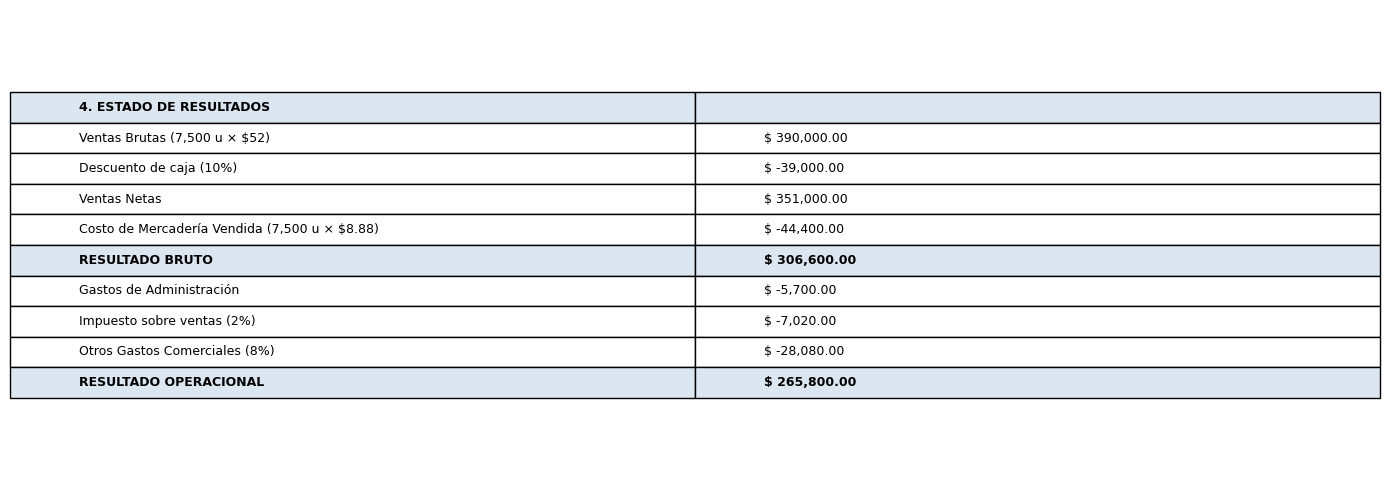

In [27]:
def crear_seccion_resultados():
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.axis('tight')
    ax.axis('off')
    
    font = FontProperties(family='monospace', size=10)

    contenido = [
        ["4. ESTADO DE RESULTADOS", ""],
        ["Ventas Brutas (7,500 u × $52)", f"$ {ventas_brutas:,.2f}"],
        ["Descuento de caja (10%)", f"$ -{descuento:,.2f}"],
        ["Ventas Netas", f"$ {ventas_netas:,.2f}"],
        ["Costo de Mercadería Vendida (7,500 u × $8.88)", f"$ -{costo_mercaderia_vendida:,.2f}"],
        ["RESULTADO BRUTO", f"$ {resultado_bruto:,.2f}"],
        ["Gastos de Administración", f"$ -{datos['Gastos de Administración']:,.2f}"],
        ["Impuesto sobre ventas (2%)", f"$ -{impuesto_ventas:,.2f}"],
        ["Otros Gastos Comerciales (8%)", f"$ -{otros_gastos_comerciales:,.2f}"],
        ["RESULTADO OPERACIONAL", f"$ {resultado_operacional:,.2f}"],
    ]
    
    table = ax.table(cellText=contenido, cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    for (i, j), cell in table.get_celld().items():
        if contenido[i][0].isupper() and not contenido[i][0].isdigit():
            cell.set_facecolor('#DCE6F1')
            cell.set_text_props(weight='bold')
        elif contenido[i][0].startswith('COSTO') or contenido[i][0].startswith('RESULTADO') or contenido[i][0].startswith('SALDO'):
            cell.set_facecolor('#FCD5B4')
            cell.set_text_props(weight='bold')
    
    plt.tight_layout()
    plt.show()

crear_seccion_resultados()

#### 5. Saldo Final de Productos Terminados

\begin{align*}
\text{Unidades no Vendidas} &= \text{Producción Terminada} - \text{Ventas} \\
\\
\text{Saldo Final PT} &= \text{Unidades no Vendidas} \times \text{Costo Unitario} \\
\end{align*}

In [28]:
# 5. Saldo final de Productos Terminados
unidades_no_vendidas = datos['Produccion Terminada unidades'] - datos['Ventas unidades']
saldo_final_pt = unidades_no_vendidas * costo_produccion_unitario
print(f"Saldo Final de Productos Terminados: ${saldo_final_pt:,.2f}")

Saldo Final de Productos Terminados: $88,800.00


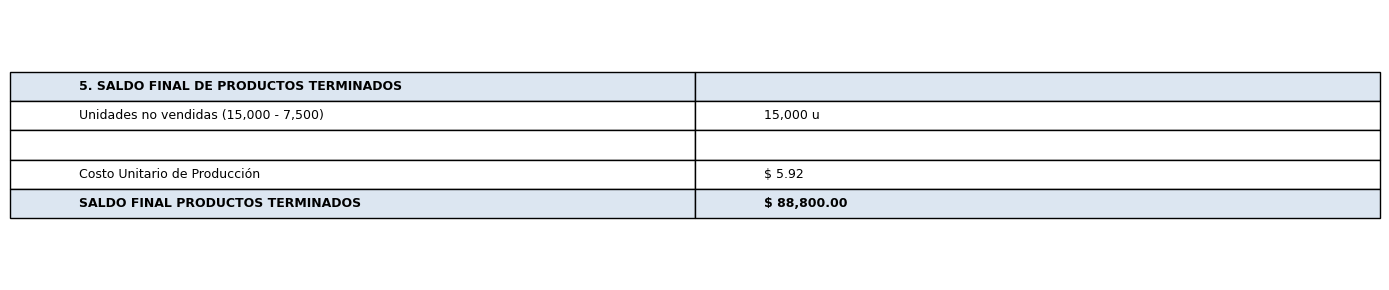

In [29]:
def crear_seccion_resultados():
    fig, ax = plt.subplots(figsize=(14, 3))
    ax.axis('tight')
    ax.axis('off')
    
    font = FontProperties(family='monospace', size=10)

    contenido = [
        ["5. SALDO FINAL DE PRODUCTOS TERMINADOS", ""],
        ["Unidades no vendidas (15,000 - 7,500)", f"{unidades_no_vendidas:,.0f} u"],
        ["", ""],
        ["Costo Unitario de Producción", f"$ {costo_produccion_unitario:,.2f}"],
        ["SALDO FINAL PRODUCTOS TERMINADOS", f"$ {saldo_final_pt:,.2f}"]
    ]
    
    table = ax.table(cellText=contenido, cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    for (i, j), cell in table.get_celld().items():
        if contenido[i][0].isupper() and not contenido[i][0].isdigit():
            cell.set_facecolor('#DCE6F1')
            cell.set_text_props(weight='bold')
        elif contenido[i][0].startswith('COSTO') or contenido[i][0].startswith('RESULTADO') or contenido[i][0].startswith('SALDO'):
            cell.set_facecolor('#FCD5B4')
            cell.set_text_props(weight='bold')
    
    plt.tight_layout()
    plt.show()

crear_seccion_resultados()

In [30]:
def exportar_a_excel():
    try:
        resultados = {
            'Concepto': [
                'Materia Prima Directa', 'Mano de Obra Directa', 'Costo Primo Total',
                'Costos Indirectos de Fabricación', 'Costo de Conversión Total',
                'Costo de Producción Total', 'Ventas Netas', 'Costo Mercadería Vendida',
                'Resultado Bruto', 'Resultado Operacional', 'Saldo Final Productos Terminados'
            ],
            'Valor ($)': [
                materia_prima_directa, mano_obra_directa, costo_primo_total,
                cif, costo_conversion_total, costo_produccion_total,
                ventas_netas, costo_mercaderia_vendida, resultado_bruto,
                resultado_operacional, saldo_final_pt
            ]
        }
        
        df = pd.DataFrame(resultados)
        df.to_excel('resultados_costos.xlsx', index=False)
        print("\nResultados exportados a 'resultados_costos.xlsx'")
    
    except ModuleNotFoundError:
        print("\nError: El módulo 'openpyxl' no está instalado.")
        print("Instálalo ejecutando: pip install openpyxl")
    
    except Exception as e:
        print(f"\nError al exportar a Excel: {e}")

exportar_a_excel()


Resultados exportados a 'resultados_costos.xlsx'
